# Temporal accumulation of records
## The UB Herbarium species occurrence dataset

In [1]:
# Setting paths
import sys,os
import pathlib
sys.path.insert(0,os.path.expanduser('~/caryocar'))
sys.path.insert(0,os.path.abspath('..'))

In [2]:
# Building the networks from data
from setupmodels import occs

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_color_codes('deep')

%matplotlib inline

---

## Loading the dataset

In [109]:
dsetPath = '/home/pedro/datasets/ub_herbarium/occurrence.txt'
cols = ['eventDate', 'gbifID','recordedBy', 'scientificName', 
        'stateProvince', 'countryCode','decimalLatitude','decimalLongitude']
occs = pd.read_table(dsetPath, delimiter='\t', usecols=cols, low_memory=False, parse_dates=['eventDate'], index_col='eventDate')
occs.sort_index(inplace=True)
occs.dropna(subset=['recordedBy','scientificName'], inplace=True)

## Plotting the timeseries

For plotting the timeseries, we also want to drop records for which the datetime index is null

In [114]:
occs_ts = occs[occs.index.notna()]['gbifID'].resample(rule='A').count()

In [122]:
occs_numRecs = occs_ts.sum()
occs_cumsum = occs_ts.cumsum().apply(lambda x: x/occs_numRecs)

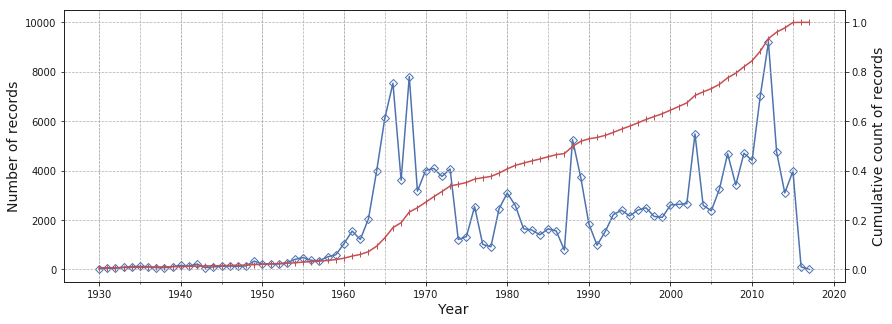

In [250]:
startYear = '1930'
f,ax1 = plt.subplots(figsize=(14,5))
ax2 = plt.twinx(ax=ax1)
occs_cumsum[startYear:].plot(ax=ax2, marker='|',color='r')
occs_ts[startYear:].plot(ax=ax1,marker='D', markeredgewidth=1, markerfacecolor='none',ms=6, color='b')

ax1.grid(which='both',axis='x',ls='--',lw=.7)
ax2.grid(axis='y',ls='--',lw=.7)

ax1.set_ylim((-5e2, 10500))
ax2.set_ylim((-5e-2, 1.05))

ax1.set_ylabel('Number of records', size=14)
ax1.set_xlabel('Year',size=14)
ax2.set_ylabel('Cumulative count of records',size=14)

f.savefig('./ub_records_timeseries.pdf',dpi=192, format='pdf',bbox_inches='tight')